In [61]:
import scipy.stats as stats
import random

In [62]:
random.seed(42)

In [63]:
class Element:
    def __init__(self, min=None, ml=None, max=None, resultSet=None, confidence=2.0, skewness=0):
        # initialising a raw element
        self.min = min
        self.ml = ml
        self.max = max
        self.confidence = confidence  # 0.5 for low, 2 for medium, 5 for high
        self.skewness = skewness
        
        # initialising a element created by computation
        self.resultSet = resultSet

        # populate distribution
        if min is not None and ml is not None and max is not None:
            # Calculate alpha and beta based on skewness
            base_alpha = (4 * (self.ml - self.min) + (self.max - self.min)) / (self.max - self.min)
            base_beta = (4 * (self.max - self.ml) + (self.max - self.min)) / (self.max - self.min)

            # Adjust alpha and beta for skewness
            alpha = base_alpha * (1 - self.skewness)
            beta = base_beta * (1 + self.skewness)

            # Adjust alpha and beta for confidence
            alpha *= self.confidence
            beta *= self.confidence

            # Create a PERT distribution
            self.pert_dist = stats.beta(alpha, beta, loc=self.min, scale=self.max - self.min)
        
    def fetchValue(self):
        # Sample a value from the PERT distribution
        return self.pert_dist.rvs(random_state=None) if self.resultSet is None else random.choice(self.resultSet)
    
    def result(self):
        return self.resultSet

In [64]:
class Entity(Element):
    def __init__(self, elementLeft, elementRight):
        self.elementLeft = elementLeft
        self.elementRight = elementRight
    
    def simulate(self, operation="multiply", size=50000):
        result = []
        if operation == "multiply":
            for i in range (0,size):
                result.append(self.elementLeft.fetchValue() * self.elementRight.fetchValue())
        elif operation == "binary":
            for i in range (0,size):
                result.append((1 if self.elementLeft.fetchValue() > self.elementRight.fetchValue() else 0))
        elif operation == "add":
            for i in range (0,size):
                result.append(self.elementLeft.fetchValue() + self.elementRight.fetchValue())
        super().__init__(resultSet=result)

In [65]:
cf = Element(min=0,ml=10,max=100)
poa = Element(min=0,ml=0.3,max=0.5)
tef = Entity(cf, poa)
tef.simulate()

In [66]:
tcap = Element(min=0.8,ml=0.9,max=0.99)
rs = Element(min=0.75,ml=0.8,max=0.9)
vuln = Entity(tcap, rs)
vuln.simulate(operation="binary")

In [67]:
slef = Element(min=30000,ml=500000,max=300000000)
slm = Element(min=0,ml=0,max=1)
sl = Entity(slef, slm)
sl.simulate()

In [68]:
plm = Element(min=300000,ml=1000000,max=600000000)
lm = Entity(plm, sl)
lm.simulate(operation="add")

In [69]:
lef = Entity(tef, vuln)
lef.simulate()

In [70]:
risk = Entity(lef,lm)
risk.simulate()

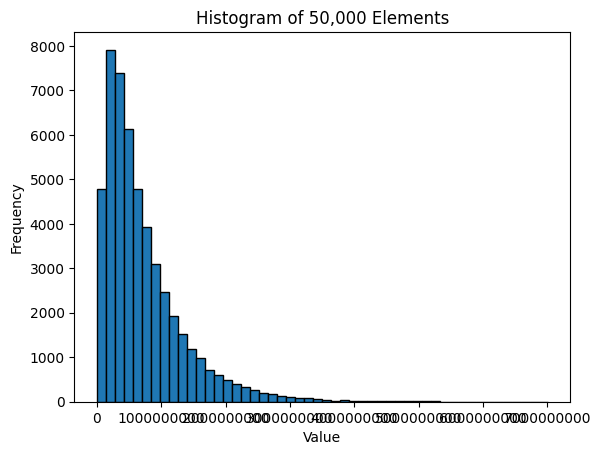

In [71]:
data = risk.result()

import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
plt.hist(data, bins=50, edgecolor='black')

# Add titles and labels
plt.title('Histogram of 50,000 Elements')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()

In [72]:
sum(risk.result()) / len(risk.result())

715863620.9014702